In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
import yfinance as yf

# Get the Stock Code
df = yf.download('PSO.KA', start='2023-08-01', end='2023-08-31')

# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,138.250000,138.949997,132.500000,134.899994,134.899994,4265786
2023-08-02,134.899994,136.800003,133.199997,135.449997,135.449997,3063830
2023-08-03,135.500000,136.000000,131.509995,132.210007,132.210007,2600290
2023-08-04,130.500000,134.500000,130.110001,133.679993,133.679993,2799533
2023-08-07,135.000000,136.000000,128.520004,130.089996,130.089996,2219136
2023-08-08,129.100006,129.500000,120.330002,120.760002,120.760002,2909062
2023-08-09,119.000000,127.870003,118.989998,125.760002,125.760002,3893284
2023-08-10,126.500000,129.000000,121.099998,123.110001,123.110001,3156691
2023-08-11,121.300003,128.490005,121.300003,124.849998,124.849998,5177006


In [3]:
#Get the number of rows and columns in the data set
df.shape

(21, 6)

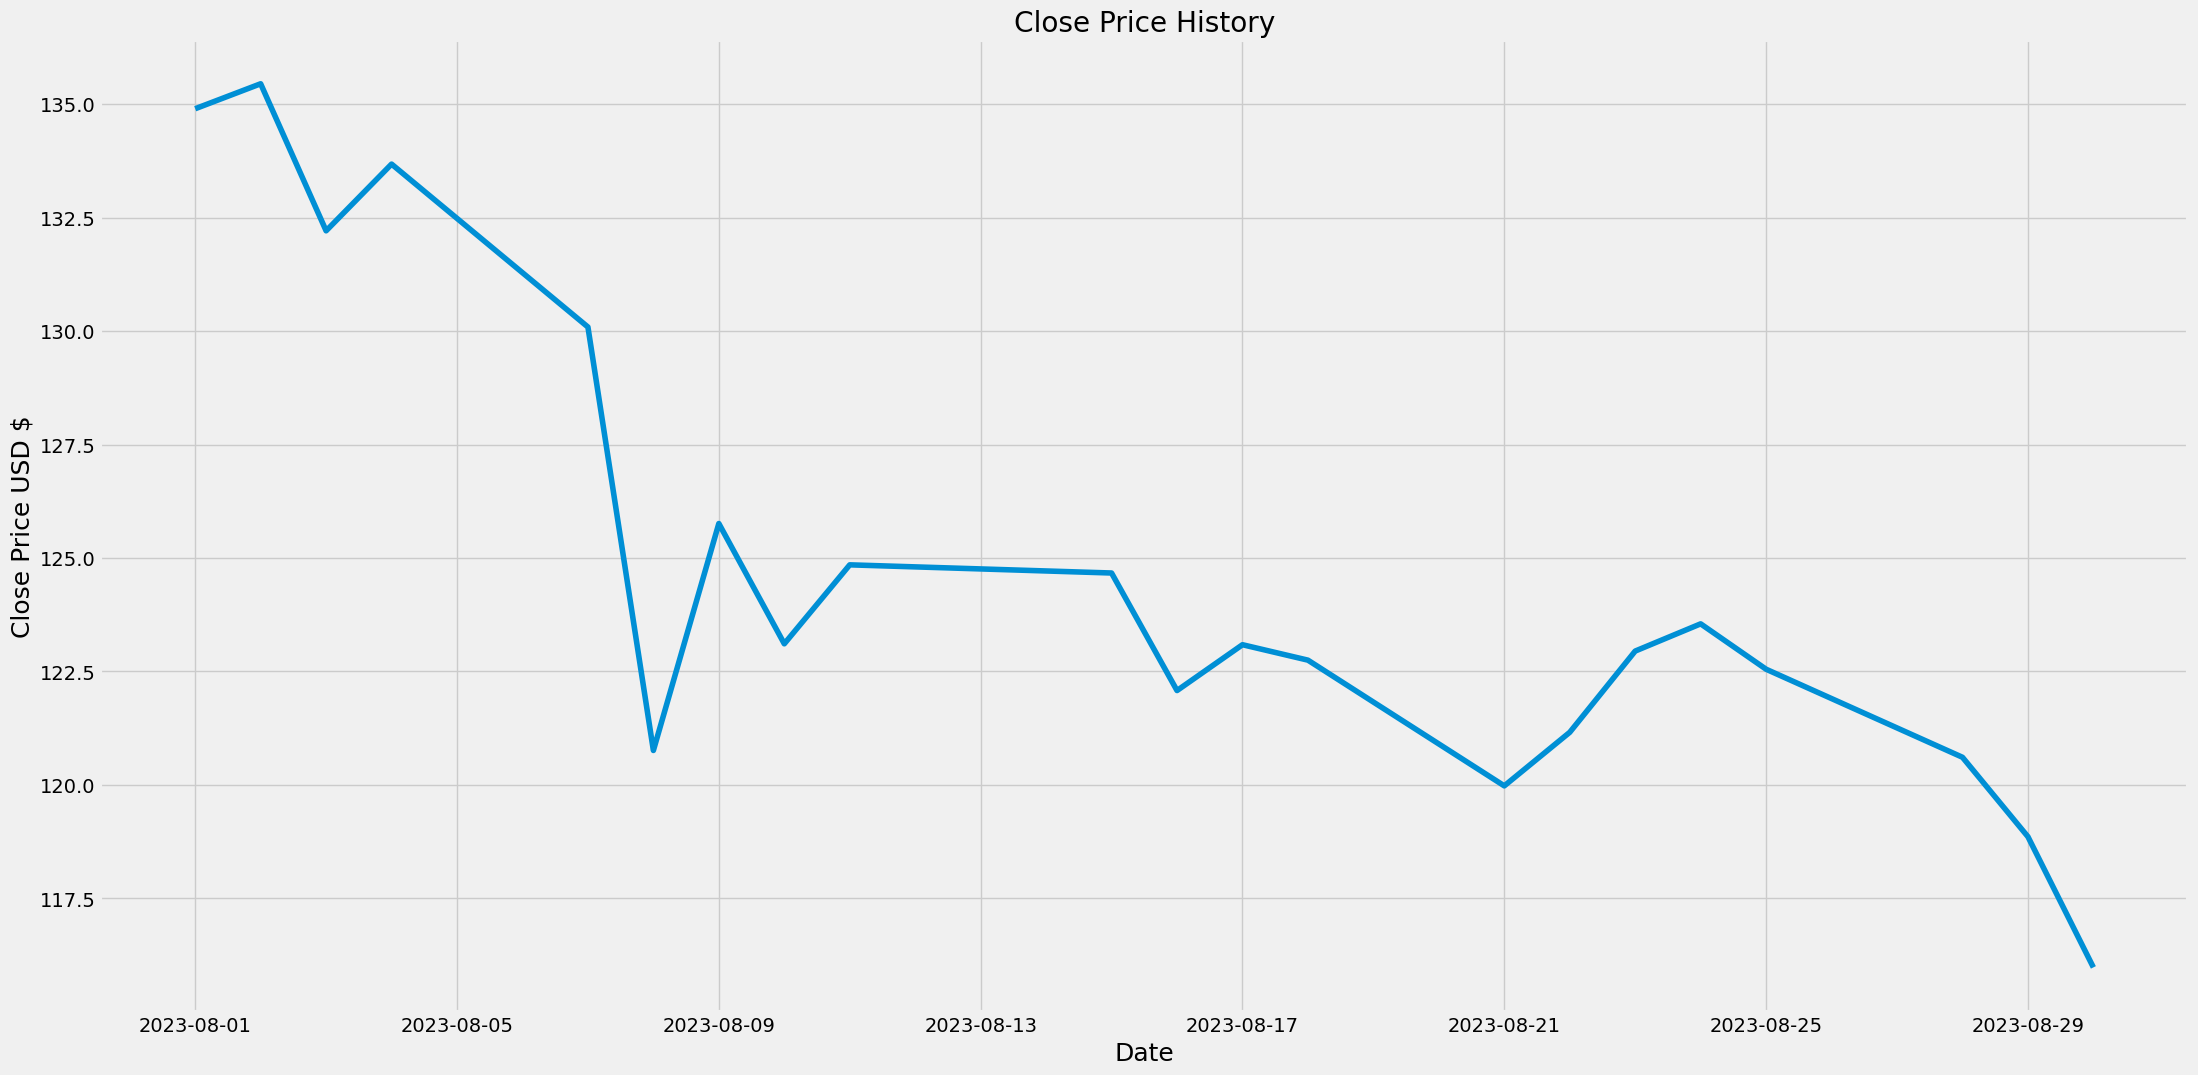

In [4]:
#Visualize the closing price history
plt.figure(figsize=(24,12))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe into numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

17

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.97175125],
       [1.        ],
       [0.83359059],
       [0.90909066],
       [0.72470455],
       [0.24550592],
       [0.50231135],
       [0.3662044 ],
       [0.45557258],
       [0.44632756],
       [0.31330254],
       [0.36517696],
       [0.34771437],
       [0.20544434],
       [0.26605044],
       [0.35798643],
       [0.3888034 ],
       [0.33744231],
       [0.23780168],
       [0.14791978],
       [0.        ]])

In [19]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<=10:
        print(x_train)
        print(y_train)
        print()

[array([0.97175125, 1.        , 0.83359059, 0.90909066, 0.72470455,
       0.24550592, 0.50231135, 0.3662044 , 0.45557258, 0.44632756])]
[0.313302541447376]



In [20]:
#Convert hte x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(7, 10, 1)

In [22]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
#Train the Model
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.1179
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0804
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0500
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0270
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0120
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0062
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0219
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0209
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0167
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0120
Epoch 13/100
1/1 [==============================] -

In [25]:
#Create the testing data set
#Create a new array containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len - 10: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])

In [26]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [27]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 606ms/step


In [29]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

3.1630652402254467

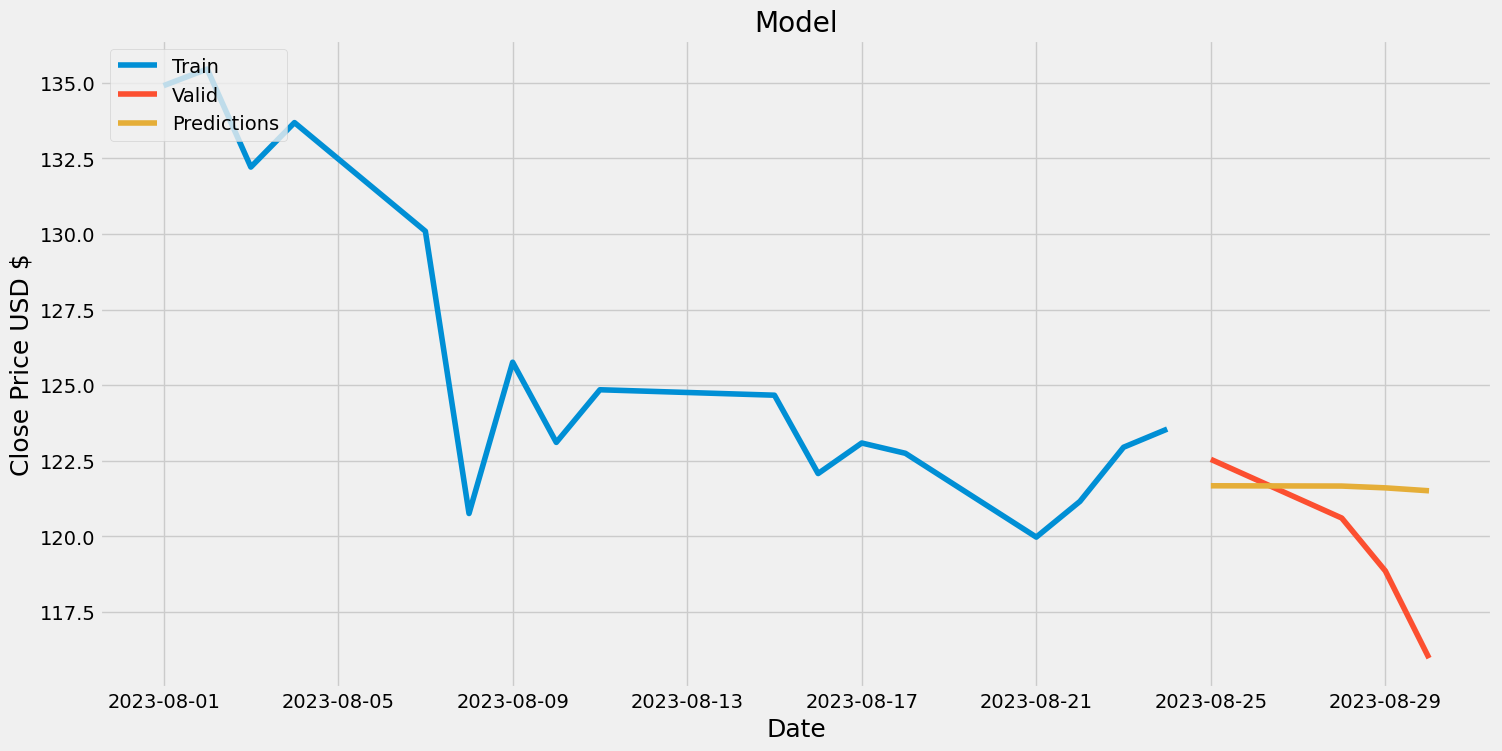

In [30]:
#Plot the data
train = data[:training_data_len]
x_valid = data[training_data_len:]

import pandas as pd

# Assuming you have a column named 'Close' in the 'data' DataFrame
valid = pd.DataFrame()
valid['Close'] = data[training_data_len:]['Close']
valid['Predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [31]:
#Show the valid predicted price
valid

,Close,Predictions
Date,,
2023-08-25,122.550003,121.676521
2023-08-28,120.610001,121.667221
2023-08-29,118.860001,121.607727
2023-08-30,115.980003,121.510757


In [33]:
import yfinance as yf

# Download the data for the 'PSO.KA' stock from a different date range
pso_quote = yf.download('PSO.KA', start='2023-08-22', end='2023-08-24')

# Continue with the rest of your code using the 'apple_quote' DataFrame
# ...

# Print the 'Close' column
print(pso_quote['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-08-22    121.160004
2023-08-23    122.949997
Name: Close, dtype: float64
